# Connectivity Data Analysis with Study Class

This notebook covers:
- Loading study data
- Running regression models
- Creating specification curves

## 1. Loading the Data

First, we'll import the Study class and load both the unmerged and merged datasets.

In [ ]:
from statistical_model import Study
import importlib
import sys
# # Load unmerged and merged study datasets
# study = Study.load("study_merged_huge.cdb")
# study2 = Study.load("study_unmerged_huge.cdb")

## 2. Exploring the Data

Let's examine the basic properties of both datasets using the `summary()` method.

In [4]:
print("Unmerged study summary:")
study.summary()

Unmerged study summary:
Study summary: 4620 measurements loaded

Nodes by label:
CEN:
       L-ITG, L-SFG, L-SUP, L-pSTG, R-IFG, R-ITG, R-SFG, R-SUP, R-pSTG
DMN:
       L-ANG, L-IFG, L-PREC, L-aSTG, L-mPFC, R-ANG, R-PREC, R-aSTG, R-mPFC
SN:
       L-ACC, L-INS, R-ACC, R-INS

Measurement conditions:
  bands: alpha, beta, delta, gamma, theta
  city: merged(Kraków,Warszawa)
  eyes: eyes closed, eyes open

Samples:
  Sample ID: merged_sample, Subjects: 107

Permutation Statistics:
  Original Mean Contrast: 0.0216
  Original Median Contrast: 0.0196
  Mean Contrast p-value: 0.2151
  Median Contrast p-value: 0.2919
  Mean Contrast 95% CI: [-0.0343, 0.0330]
  Median Contrast 95% CI: [-0.0360, 0.0352]
  Number of permutations: 10000


In [5]:
print("\nMerged study summary:")
study2.summary()


Merged study summary:
Study summary: 9240 measurements loaded

Nodes by label:
CEN:
       L-ITG, L-SFG, L-SUP, L-pSTG, R-IFG, R-ITG, R-SFG, R-SUP, R-pSTG
DMN:
       L-ANG, L-IFG, L-PREC, L-aSTG, L-mPFC, R-ANG, R-PREC, R-aSTG, R-mPFC
SN:
       L-ACC, L-INS, R-ACC, R-INS

Measurement conditions:
  bands: alpha, beta, delta, gamma, theta
  city: Kraków, Warszawa
  eyes: eyes closed, eyes open

Samples:
  Sample ID: city_Kraków, Subjects: 40
  Sample ID: city_Warszawa, Subjects: 67

Permutation Statistics:
  Original Mean Contrast: 0.0229
  Original Median Contrast: 0.0200
  Mean Contrast p-value: 0.1930
  Median Contrast p-value: 0.2688
  Mean Contrast 95% CI: [-0.0346, 0.0337]
  Median Contrast 95% CI: [-0.0352, 0.0345]
  Number of permutations: 10000


## 3. Regression Analysis

Now let's run regression models on our data. We'll try different formulations and compare the results.

### Model 1: (Merged Data)

In [ ]:
# Model using band, city, eyes and network relation in unmerged data
model1_results = study.regression("~ city + eyes + network_relation+bands+ network_relation:bands", 
                                 add_network_categories=True, n_permutations=10000)

print(study.print_apa_format(model1_results))

Calculating permutation-based statistics...
Regression Analysis Results (APA Format)
----------------------------------------
Model: contrast ~ city + eyes + network_relation+bands+ network_relation:bands

The regression model explained 0.164 of the variance, F = 19.904, p = 0.192
Note: p-values are permutation-based (permuted group)

Contrast Statistics:
Mean Contrast: 0.022, 95% CI [-0.034, 0.033], p = 0.215
Median Contrast: 0.020, 95% CI [-0.036, 0.035], p = 0.292

Regression Coefficients:
Parameter            Estimate   SE         t          p         
-------------------- ---------- ---------- ---------- ----------
Intercept            0.042      0.046      5.080      0.388      [-0.048, 0.132]     
eyes open            -0.010     0.011      -3.505     0.394      [-0.032, 0.011]     
CEN→DMN              0.068      0.023      6.080      0.004   ** [0.024, 0.113]      
CEN→SN               0.056      0.036      3.971      0.137      [-0.014, 0.127]     
DMN→CEN              -0.021 

### Model 2: (Unmerged Data)

In [17]:
# Model with network relation and bands interaction in merged data
model2_results = study2.regression("~ eyes + network_relation+bands+ network_relation:bands", 
                                   add_network_categories=True, n_permutations=10000)
print(study2.print_apa_format(model2_results))

Calculating permutation-based statistics...
Regression Analysis Results (APA Format)
----------------------------------------
Model: contrast ~ eyes + network_relation+bands+ network_relation:bands

The regression model explained 0.054 of the variance, F = 11.600, p = 0.147
Note: p-values are permutation-based (permuted group)

Contrast Statistics:
Mean Contrast: 0.023, 95% CI [-0.035, 0.034], p = 0.193
Median Contrast: 0.020, 95% CI [-0.035, 0.034], p = 0.269

Regression Coefficients:
Parameter            Estimate   SE         t          p         
-------------------- ---------- ---------- ---------- ----------
Intercept            0.038      0.042      3.942      0.426      [-0.044, 0.121]     
eyes open            -0.009     0.011      -2.718     0.480      [-0.031, 0.013]     
CEN→DMN              0.068      0.021      5.173      0.006   ** [0.026, 0.110]      
CEN→SN               0.040      0.030      2.441      0.239      [-0.019, 0.100]     
DMN→CEN              -0.015     0.0

## 4. Specification Curve Analysis

Specification curve analysis allows us to visualize how results vary across different model specifications.

### Quick Specification Curve (Unmerged Data)

Generating quick specification curve...


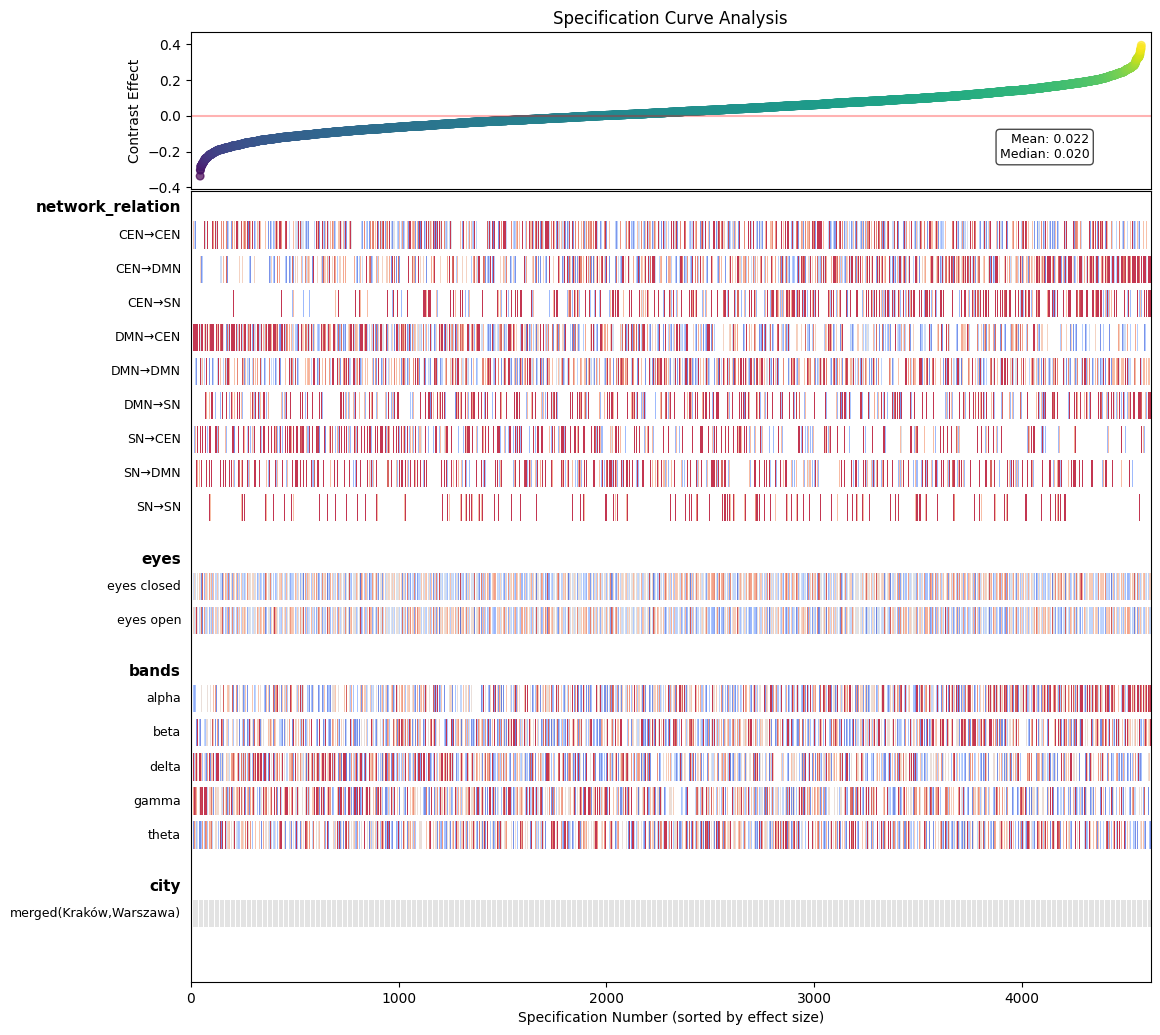

In [15]:
# Generate a specification curve withm arged data
print("Generating quick specification curve...")
spec_df, results_df = study.specification_curve(add_network_categories=True, plot_type = 'density')